## Logisctics regression

probability of events

In [8]:
!pip install pandas numpy statsmodels scikit-learn matplotlib

In [12]:
!pip install openpyxl --upgrade

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score,roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Replace with your actual data file path
data = pd.read_excel("week3data.xlsx")  # Load your dataset
print(data.head())  # Display the first few rows of the dataset

    hrs  pass
0  0.50     0
1  0.75     0
2  1.00     0
3  1.25     0
4  1.50     0


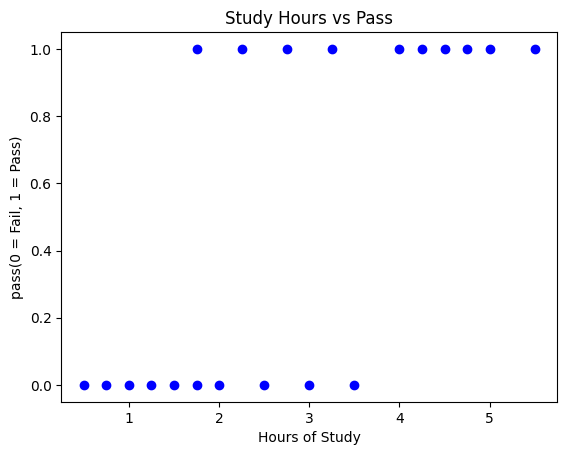

In [3]:
# Plotting the data
plt.scatter(data['hrs'], data['pass'], color='blue')
plt.xlabel('Hours of Study')
plt.ylabel('pass(0 = Fail, 1 = Pass)')
plt.title('Study Hours vs Pass')
plt.show()

In [4]:
# Define the independent variable (Hours) and the dependent variable (Pass)
X = data['hrs']
y = data['pass']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.4208
Time:                        09:46:19   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hrs            1.5046      0.

In [5]:
# null hypothesis = kei effect bhako choina --0 . There is significance effect in hours to pass.

In [6]:
# CLASSIFICATION PROBLEM - r sqaure

In [9]:
# b0 and b1 ko value kasre aaucha- value ko minimize - YESMA ERROR- MLE - testo value of b0 and b1 testo proability maximum garni 

In [11]:
# FULLL model = sbai b0 and b1 - final model
# NULL Model = kunai parameter nahali banako model- avearge accuracy

In [13]:
 # LLR p-value:                 0.0006365 - fit gareko choina bhen

In [14]:
# odds = np.exo(model.params)
# conf = np.



In [15]:
# 1 unit le padhyo bhane 1.31% le pass huni chance badi huncha

In [16]:
# AIC AND BIC == LOW BHAKO RAMRO

In [17]:
# CLASSIFIER ==confusion matrix

In [19]:
CLASSIFIER
# FALSE NEGATIVE = hunu parni 1 thyo 0 aayo 
# 1THYO 1 NAI = TRUE POSITIVE
# O THYO 1 = FALSE POSTIVE
# 1 THYO 0 = TRUE NEGATIVE

In [20]:
# OVERFITTING KO PROBELM -- TEI DATA MATRA BUJNA SAKCHA

In [21]:
# Odds ratios and 95% CI
odds_ratios = np.exp(model.params)
conf = np.exp(model.conf_int())
conf['OR'] = odds_ratios

# Renaming columns for better clarity
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
print("Odds Ratios and 95% Confidence Intervals:\n", conf)

Odds Ratios and 95% Confidence Intervals:
            2.5%      97.5%  Odds Ratio
const  0.000537   0.534605    0.016946
hrs    1.313080  15.439291    4.502557


In [22]:
# Predicting probabilities and binary outcome
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [23]:
y_pred_prob,y_pred

(0     0.034710
 1     0.049773
 2     0.070892
 3     0.100029
 4     0.139344
 5     0.190837
 6     0.190837
 7     0.255703
 8     0.333530
 9     0.421627
 10    0.515011
 11    0.607359
 12    0.692617
 13    0.766481
 14    0.874448
 15    0.910278
 16    0.936624
 17    0.955611
 18    0.969097
 19    0.985194
 dtype: float64,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    1
 11    1
 12    1
 13    1
 14    1
 15    1
 16    1
 17    1
 18    1
 19    1
 dtype: int32)

In [24]:
cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[8 2]
 [2 8]]


In [26]:
# Sensitivity and Specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y, y_pred)



In [27]:
print(f"\nSensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Sensitivity (True Positive Rate): 0.80
Specificity (True Negative Rate): 0.80
Accuracy: 0.80


In [28]:
# THRESHOLD = 0. 5=IF(C2>=0.5, 1,0) 

In [30]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)


In [31]:
roc_curve(y,y_pred_prob)

(array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 1. ]),
 array([0. , 0.1, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 1. , 1. ]),
 array([       inf, 0.98519444, 0.8744475 , 0.76648084, 0.69261733,
        0.60735865, 0.51501086, 0.42162653, 0.33353024, 0.25570318,
        0.1908365 , 0.03471034]))

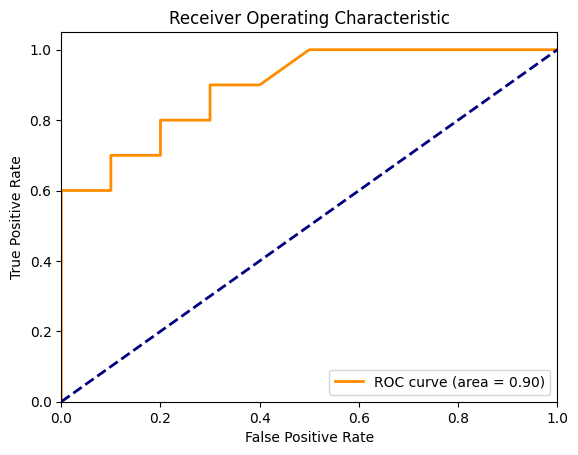

ROC AUC Score:  0.895


In [32]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC AUC score
print("ROC AUC Score: ", roc_auc_score(y, y_pred_prob))

In [33]:
# AUC IS GREATHER THAN 0.7, OUR MODEL PREDICTION GARNA SAKINCHA